# **Digit Recognition using MNIST dataset**

***First we import the mnist dataset.***
A standard benchmark for neural network classification is the MNIST digits dataset, a set of 70,000 28×28 images of hand-written digits. Each MNIST digit is labeled with the correct digit class (0, 1, ... 9). 

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784')

In [ ]:
x = mnist['data'] # x is the set of images to be imported
y = mnist['target'] # y is the value corresponding to the image

In [ ]:
x.shape #each image with 784 features

(70000, 784)

In [ ]:
y.shape # corresponding to the image data x, y is the target

(70000,)

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt

In [ ]:
some_digit = x[0] # Lets take image that has to be recognised
some_digit_image = some_digit.reshape(28,28) # Reshape into 28x28 matrix
some_digit_target = y[0] #Target of the image
print(some_digit_target)

5


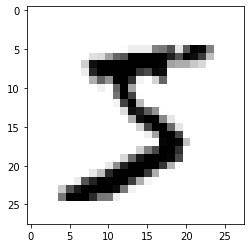

In [ ]:
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary, interpolation="nearest")#Plot the image using matplotlib

***Divide dataset into training and testing datasets***

In [ ]:
x_train= x[:60000] #assign first 60000 to training
x_test =x[60000:] #And next 60000 to testing
y_train=y[:60000]
y_test =y[60000:]

Here we shuffle the data because maybe the source had the data in sorted order. So in order to distribute all the values evenly in both training and test datasets we shuffle as follows.

In [ ]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

***Now let's detect a value, say 5 that we got in the target above, and also calculate the accuracy of our model.***

In [ ]:
y_train = y_train.astype(np.int8) # we convert to int because data present as string in the numpy matrix
y_test = y_test.astype(np.int8)
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [ ]:
y_test_5

array([False, False, False, ..., False,  True, False])

Here we will use Logistic regression to predict the image target. We choose logistic regression as the image either can be 5 or can't be 5. Therefore Logistic regression is most suitable for such discrete outcomes.

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(x_train,y_train_5) #Train the model by fitting the dataset

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf.predict([some_digit])

array([ True])

Therefore the given value is 5, and it's right as we already know the target.
Hence our digit recognition model is working.


---



Now testing the model's accuracy as follows: 

In [ ]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf,x_train, y_train, y_train_5, cv = 3, scoring = "accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
a.mean()

0.9177666666666666

The model is 91.78% accurate.